# Discovering Periodic-Frequent patterns in Big Data Using PFPMC Algorithm

In this tutorial, we will discuss the first approach to find Periodic-Frequent patterns in big data using PFPMC algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Periodic-Frequent patterns using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing PFPMC on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PFPMC algorithm

In [1]:
from PAMI.periodicFrequentPattern.basic import PFPMC  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'temporal_T10I4D100K.csv'

minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.
maxmunPeriodCount = 500
seperator = '\t'       

#### Step 3: Execute the PFPMC algorithm

In [3]:
obj = alg.PFPMC(iFile=inputFile, minSup=minimumSupportCount,maxPer=maxmunPeriodCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='periodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 229


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 686.8521497249603


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 1161199616
Memory (USS): 1122627584


# Advanced Tutorial on Implementing PFPMC Algorithm

In this tutorial, we will discuss the first approach to find Periodic-Frequent patterns in big data using PFPMC algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Periodic-Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the PFPMC algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the PFPMC algorithm and pandas data frame

In [1]:
from PAMI.periodicFrequentPattern.basic import PFPMC  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'temporal_T10I4D100K.csv'
seperator = '\t'
maxmunPeriodCount = 5000
minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'maxPer','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFPMC algorithm

#### Step 3: Execute the PFPMC algorithm using a for loop

In [3]:
algorithm = 'PFPMC'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.PFPMC(iFile=inputFile, minSup=minSupCount,maxPer=maxmunPeriodCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maxmunPeriodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 
Periodic-Frequent patterns were generated successfully using PFPDiffset ECLAT algorithm 


#### Step 4: Print the result

In [4]:
print(result)

  algorithm  minSup  maxPer  patterns      runtime      memory
0     PFPMC    1000    5000       385  1525.650484  1823825920
1     PFPMC    1500    5000       237   635.247543  1204428800
2     PFPMC    2000    5000       155   280.779971   861159424
3     PFPMC    2500    5000       107   144.305813   659865600
4     PFPMC    3000    5000        60    57.411468   463773696


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

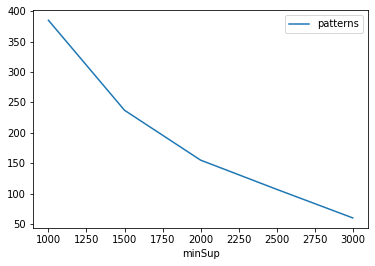

Graph for No Of Patterns is successfully generated!


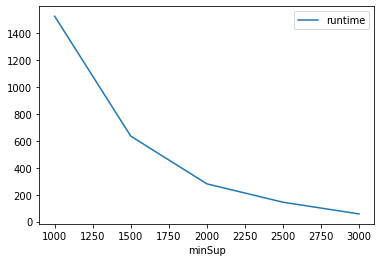

Graph for Runtime taken is successfully generated!


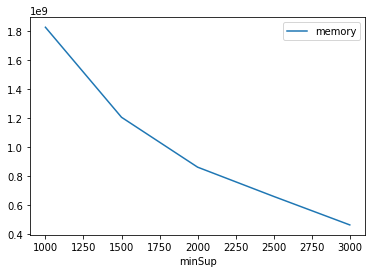

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
